<img src=../figures/Brown_logo.svg width=50%>

## Data-Driven Design & Analyses of Structures & Materials (3dasm)

## Lecture 17

### Martin van der Schelling | <a href = "mailto: m.p.vanderschelling@tudelft.nl">m.p.vanderschelling@tudelft.nl</a>  | Doctoral Candidate

### Miguel A. Bessa | <a href = "mailto: miguel_bessa@brown.edu">miguel_bessa@brown.edu</a>  | Associate Professor

**What:** A lecture of the "3dasm" course

**Where:** This notebook comes from this [repository](https://github.com/bessagroup/3dasm_course)

**Reference for entire course:** Murphy, Kevin P. *Probabilistic machine learning: an introduction*. MIT press, 2022. Available online [here](https://probml.github.io/pml-book/book1.html)

**How:** We try to follow Murphy's book closely, but the sequence of Chapters and Sections is different. The intention is to use notebooks as an introduction to the topic and Murphy's book as a resource.
* If working offline: Go through this notebook and read the book.
* If attending class in person: listen to me (!) but also go through the notebook in your laptop at the same time. Read the book.
* If attending lectures remotely: listen to me (!) via Zoom and (ideally) use two screens where you have the notebook open in 1 screen and you see the lectures on the other. Read the book.

## **OPTION 1**. Run this notebook **locally in your computer**:
1. Confirm that you have the '3dasm' mamba (or conda) environment (see Lecture 1).
2. Go to the 3dasm_course folder in your computer and pull the last updates of the [repository](https://github.com/bessagroup/3dasm_course):
```
git pull
```
    - Note: if you can't pull the repo due to conflicts (and you can't handle these conflicts), use this command (with **caution**!) and your repo becomes the same as the one online:
        ```
        git reset --hard origin/main
        ```
3. Open command window and load jupyter notebook (it will open in your internet browser):
```
jupyter notebook
```
5. Open notebook of this Lecture and choose the '3dasm' kernel.

## **OPTION 2**. Use **Google's Colab** (no installation required, but times out if idle):

1. go to https://colab.research.google.com
2. login
3. File > Open notebook
4. click on Github (no need to login or authorize anything)
5. paste the git link: https://github.com/bessagroup/3dasm_course
6. click search and then click on the notebook for this Lecture.

In [1]:
# Basic plotting tools needed in Python.

import matplotlib.pyplot as plt # import plotting tools to create figures
import numpy as np # import numpy to handle a lot of things!

%config InlineBackend.figure_format = "retina" # render higher resolution images in the notebook
plt.rcParams["figure.figsize"] = (8,4) # rescale figure size appropriately for slides

# To limit the number of rows to show in a dataframe, for presentation purposes:
import pandas as pd

pd.set_option('display.max_rows', 10)

## Outline for today

* Introducing a Python framework for data-driven design and analysis of structures and materials: `f3dasm`

**Reading material**: This notebook

### Installing `f3dasm`

You can install `f3dasm` with pip:

_Make sure you install the correct version (1.5.4)_

In [2]:
try:
    import f3dasm
except ModuleNotFoundError: # If f3dasm is not found in current environment, install the correct version from pip
    %pip install f3dasm==1.5.3 --quiet
    import f3dasm

Optionally, it is also possible to install from source:

```
git clone https://github.com/bessagroup/f3dasm
pip install -e .
```

For more installation instruction you can check the [installation documentation](https://github.com/bessagroup/f3dasm)

### `f3dasm`: streamlining your data-driven process!

The **f**ramework for **d**ata-**d**riven **d**esign and **a**nalysis of **s**tructures and **m**aterials (`f3dasm`) aims to generalize this workflow with interfaces (templates of code that you have to fill in)


<center><img src="../figures/f3dasm_carstoppingdistance_line.svg" title="f3dasm Car stopping distance" width="70%"></center>

Today, we will illustrate these modules by recreating the car stopping distance problem:

### The car stopping distance problem (again!)

<img src="../figures/reaction-braking-stopping.svg" title="Car stopping distance" width="50%" align="right">

Imagine we want to predict $\color{red}y$ for a given ${\color{green}x}$ but that **we had no idea** that this problem is governed by:

${\color{red}y} = {\color{blue}z} x + 0.1 {\color{green}x}^2$

- ${\color{red}y}$ is the **output**: the car stopping distance
- ${\color{green}x}$ is the **input**: the car velocity
- ${\color{blue}z}$ is a hidden variable: an <a title="random variable">rv</a> $z$ representing the driver's reaction time (in seconds)

where $z \sim \mathcal{N}(\mu_z=1.5,\sigma_z^2=0.5^2)$

### Module `design`: Creating our design-of-experiments with the `Domain` class

<img src="../figures/f3dasm_carstopping_design.svg" title="f3dasm Car stopping distance design" width="22%" align="right">

The design-of-experiment aims to describe the variability on the **input** in order to control the **output** of the experiment.

In order to create a design-of-experiment, we import the `Domain` class from the `f3dasm.design` module:

In [3]:
from f3dasm.design import Domain

domain = Domain()
print(domain)

Domain(space={}, output_space={})


Currently the domain is empty; but we can add the car velocity $x$ as an **input parameter**. <br>
Since it is a continuous variable, we use the `add_float` method.

Optionally, we can give lower and upper bounds to this variable:

In [4]:
domain.add_float(name='x', low=3.0, high=83.0)
print(domain)

Domain(space={'x': _ContinuousParameter(lower_bound=3.0, upper_bound=83.0, log=False)}, output_space={})


<center><img src="../figures/car_velocity_empty.svg" title="Car stopping distance" width="40%"></center>

Let's create the **input data** for our problem...

In [5]:
N = 33 # number of points to generate data
Data_x = np.linspace(3, 83, N) # generate a dataset with N points for velocities x between 3 and 83 m/s
print("Let's see the Data_x vector:\n", Data_x)

Let's see the Data_x vector:
 [ 3.   5.5  8.  10.5 13.  15.5 18.  20.5 23.  25.5 28.  30.5 33.  35.5
 38.  40.5 43.  45.5 48.  50.5 53.  55.5 58.  60.5 63.  65.5 68.  70.5
 73.  75.5 78.  80.5 83. ]


<center><img src="../figures/car_velocities.svg" title="Car stopping distance" width="40%"></center>

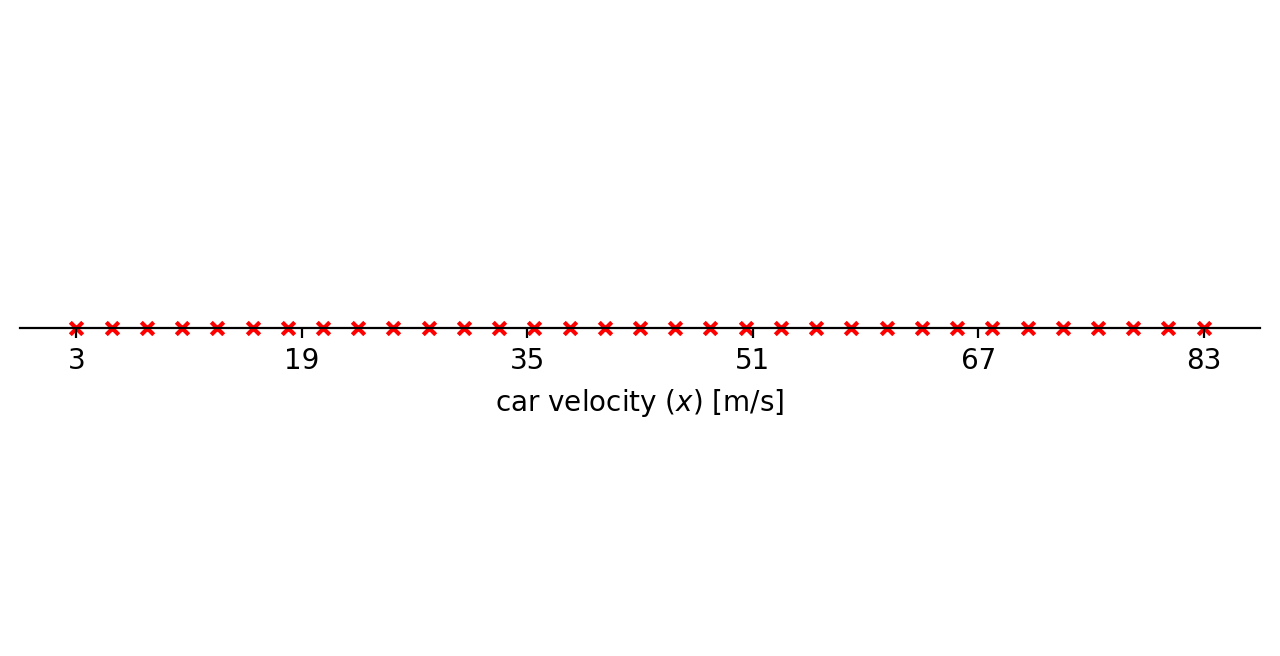

In [6]:
# Optionally: instead of importing a schematic, create the above figure with matplotlib directly:

fig, ax = plt.subplots()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_position('zero')
ax.get_yaxis().set_visible(False)
ax.set_xlabel('car velocity ($x$) [m/s]')
ax.set_xticks(np.linspace(3.0, 83.0, 6))

ax.scatter(Data_x, np.zeros(len(Data_x)), s=20, c='red', marker='x' )
plt.show()

We combine both the **domain** and the **input data** in the `f3dasm.ExperimentData` object:

In [7]:
from f3dasm import ExperimentData

In [8]:
experimentdata = ExperimentData(input_data=Data_x, domain=domain)
experimentdata

,jobs,input
,,x
0,open,3.0
1,open,5.5
2,open,8.0
3,open,10.5
4,open,13.0
...,...,...
28,open,73.0
29,open,75.5
30,open,78.0


This object is the central piece of the data-driven process with `f3dasm`!

### Module `datageneration`: Measure the car stopping distance

<!-- <img src="../figures/reaction-braking-stopping.svg" title="Car stopping distance" width="25%" align="right"> -->

<img src="../figures/f3dasm_carstopping_datageneration.svg" title="f3dasm Car stopping distance datageneration" width="22%" align="right">

We can *create* the data from the governing equation.

${\color{red}y} = {\color{blue}z} x + 0.1 {\color{green}x}^2$

- ${\color{red}y}$ is the **output**: the car stopping distance
- ${\color{green}x}$ is the **input**: the car velocity
- ${\color{blue}z}$ is a hidden variable: an <a title="random variable">rv</a> $z$ representing the driver's reaction time (in seconds)

where $z \sim \mathcal{N}(\mu_z=1.5,\sigma_z^2=0.5^2)$

We create the function `compute_distance` with the governing equation:

In [9]:
from scipy.stats import norm # import the normal dist, as we learned before!

# Define our car stopping distance function
def compute_distance(x):
    z = norm.rvs(1.5, 0.5, size=1) # randomly draw 1 sample from the normal dist.
    y = z*x + 0.1*x**2 # compute the stopping distance
    return y

<img src="../figures/car_stoppingdistance.svg" title="Car stopping distance" width="40%" align="right">

We can evaluate our input data points $x$ to retrieve the stopping distance $y$:

In [10]:
experimentdata.evaluate(compute_distance, output_names=['y'])

In [11]:
experimentdata

,jobs,input,output
,,x,y
0,finished,3.0,4.847788
1,finished,5.5,6.598518
2,finished,8.0,25.694023
3,finished,10.5,17.51116
4,finished,13.0,24.329086
...,...,...,...
28,finished,73.0,665.897566
29,finished,75.5,700.775131
30,finished,78.0,712.825761


We can extract the car stopping distance $y$ as a numpy array:

In [12]:
# to_numpy extracts both the input and output data as numpy arrays:
_, Data_y = experimentdata.to_numpy()

Text(0.5, 0, 'car velocity ($x$) [m/s]')

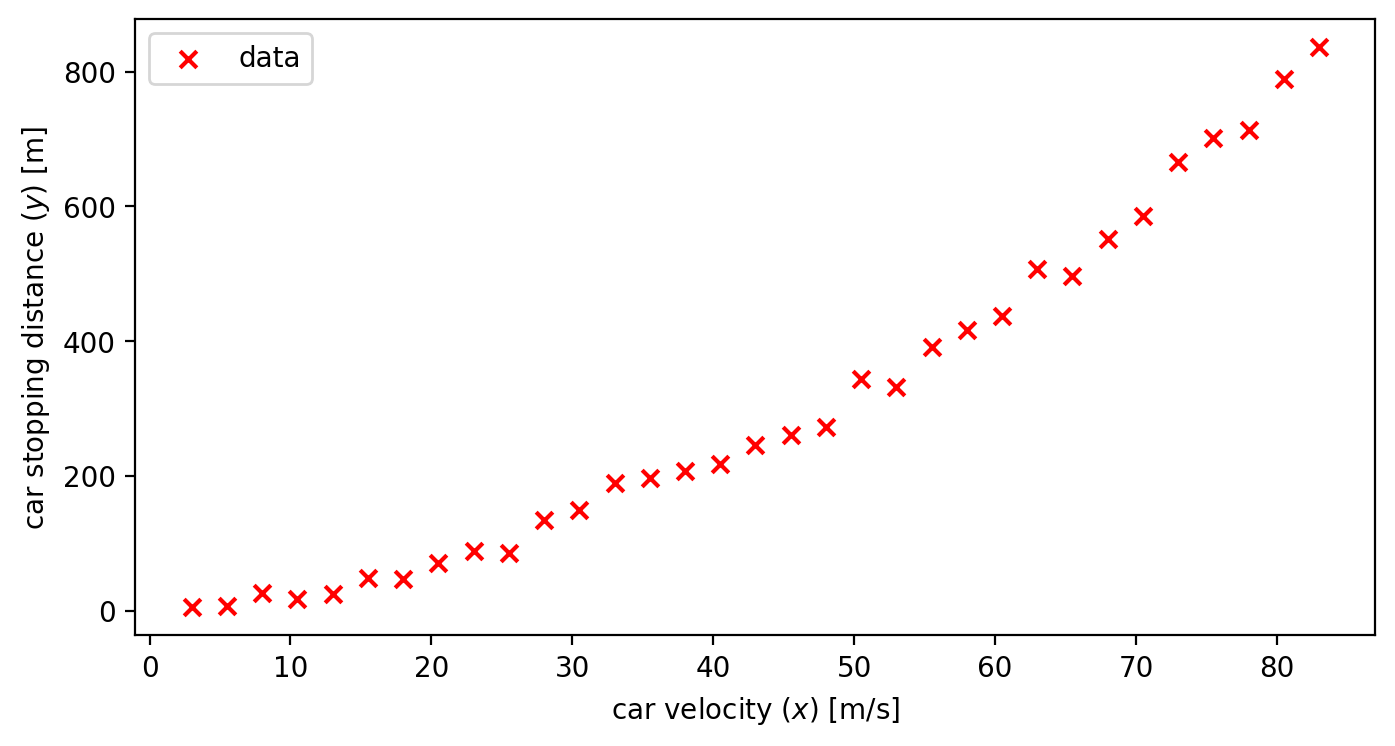

In [13]:
fig, ax = plt.subplots()
ax.scatter(Data_x, Data_y, color='r', marker='x', label='data')
ax.legend()
ax.set_ylabel('car stopping distance ($y$) [m]')
ax.set_xlabel('car velocity ($x$) [m/s]')

### Module `machine learning`: Fit a polynomial model to the data!

<img src="../figures/f3dasm_carstopping_machinelearning.svg" title="f3dasm Car stopping distance machine learning" width="22%" align="right">

In [14]:
from sklearn.preprocessing import PolynomialFeatures # For Polynomial fit
from sklearn.linear_model import LinearRegression # For Least Squares
from sklearn.pipeline import make_pipeline # to link different objects

Creating the polynomial model:

In [15]:
degree = 1
poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

Fitting the model with the data:

In [16]:
poly_model.fit(Data_x.reshape(-1, 1), Data_y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1)),
                ('linearregression', LinearRegression())])

Now, instead of using the governing equation (`compute_distance`), we can use the model to predict the car stopping distance:

In [17]:
def compute_distance_with_model(x):
    y_pred = poly_model.predict(np.array(x).reshape(-1, 1)) # We need to reshape the array
    return float(y_pred)

In [18]:
experimentdata.mark_all('open') # Mark all experiments 'open' to evaluate them again
experimentdata.evaluate(compute_distance_with_model, output_names=['y_pred'])

/tmp/ipykernel_2413840/3260301381.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(y_pred)
/tmp/ipykernel_2413840/3260301381.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(y_pred)
/tmp/ipykernel_2413840/3260301381.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(y_pred)
/tmp/ipykernel_2413840/3260301381.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future

In [19]:
experimentdata

jobs input      output            
                 x           y      y_pred
0   finished   3.0    4.847788 -100.994745
1   finished   5.5    6.598518  -75.627572
2   finished   8.0   25.694023  -50.260398
3   finished  10.5    17.51116  -24.893225
4   finished  13.0   24.329086    0.473948
..       ...   ...         ...         ...
28  finished  73.0  665.897566  609.286107
29  finished  75.5  700.775131   634.65328
30  finished  78.0  712.825761  660.020454
31  finished  80.5  789.214447  685.387627
32  finished  83.0  835.877539    710.7548

[33 rows x 4 columns]

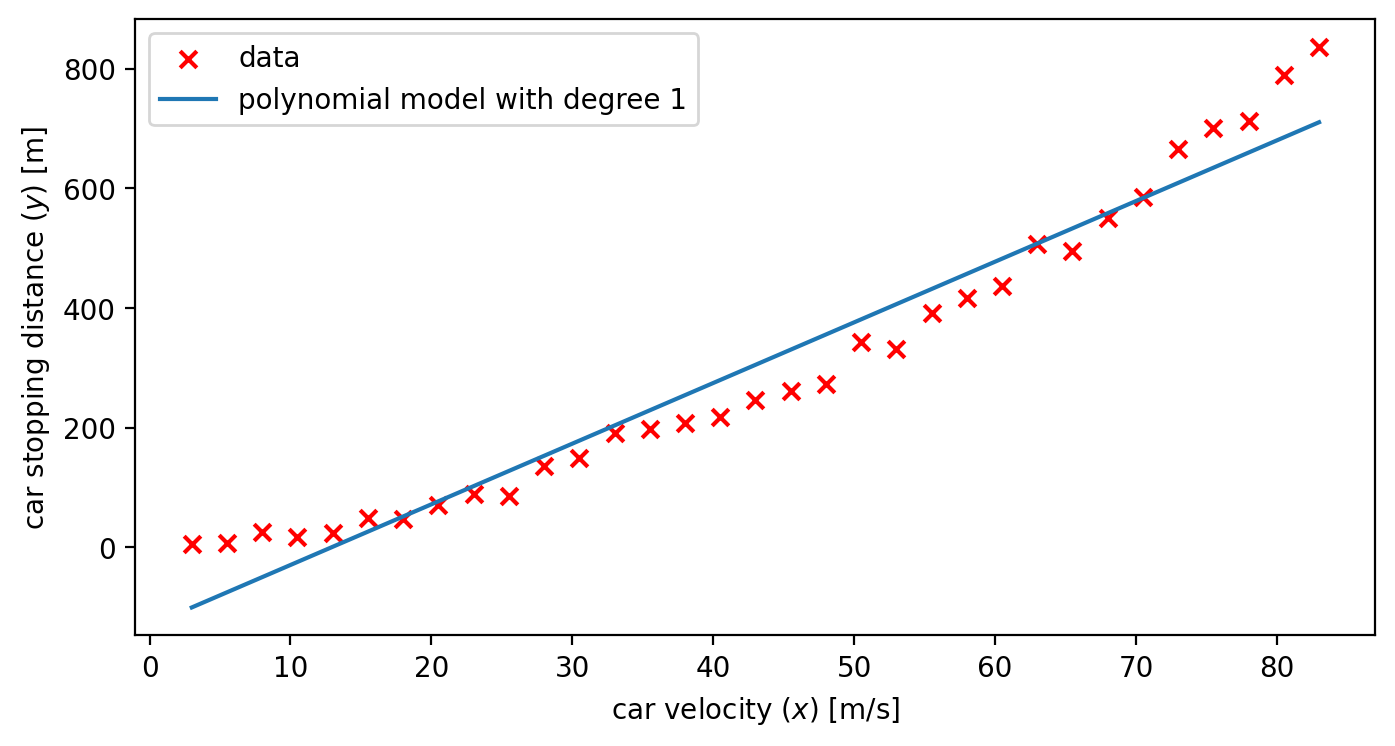

In [20]:
# Converting the ExperimentData object to numpy arrays for plotting
_, out_data = experimentdata.to_numpy()

# Plotting the data and the model prediction
fig, ax = plt.subplots()

ax.scatter(Data_x, Data_y, marker='x', color='red', label='data')
ax.plot(Data_x, out_data[:, 1], label=f'polynomial model with degree {degree}')
ax.legend()
ax.set_ylabel('car stopping distance ($y$) [m]')
ax.set_xlabel('car velocity ($x$) [m/s]')
plt.show()

## Saving the `ExperimentData`

The `ExperimentData` object can be saved to your computer is easy with the `store` method:

In [21]:
experimentdata.store('./your_data')

This will create an `experiment_data` folder in the `Lecture17/your_data` directory:

```
your_data/
└── experiment_data/
     ├── domain.pkl
     ├── input.csv
     ├── output.csv
     └── jobs.pkl    
```

Loading the `ExperimentData` from a folder is done like this:

In [22]:
ExperimentData.from_file('./your_data')

jobs input      output            
                 x           y      y_pred
0   finished   3.0    4.847788 -100.994745
1   finished   5.5    6.598518  -75.627572
2   finished   8.0   25.694023  -50.260398
3   finished  10.5    17.51116  -24.893225
4   finished  13.0   24.329086    0.473948
..       ...   ...         ...         ...
28  finished  73.0  665.897566  609.286107
29  finished  75.5  700.775131   634.65328
30  finished  78.0  712.825761  660.020454
31  finished  80.5  789.214447  685.387627
32  finished  83.0  835.877539    710.7548

[33 rows x 4 columns]

### See you next class

Have fun!